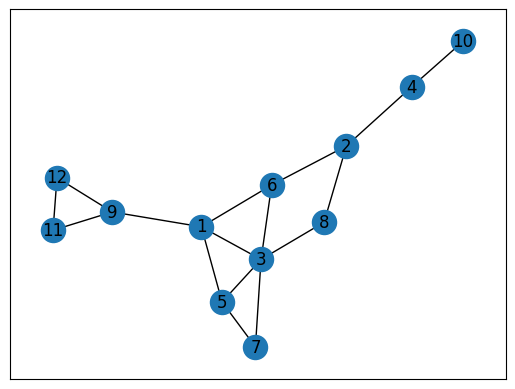

In [ ]:
import networkx as nx


g = nx.Graph()
# g.add_edges_from([(1, 3), (3, 6), (5, 7), (7, 3), (5, 1), (2, 6), (2, 8), (8, 3), (2, 4), (4, 10),(1, 9), (9, 11), (11, 12)])
g.add_edges_from([(1, 3), (3, 5), (3, 6), (5, 7), (7, 3), (5, 1), (1, 6), (2, 6), (2, 8), (8, 3), (2, 4), (4, 10),(1, 9), (9, 11), (11, 12), (12, 9)])

nx.draw_networkx(g, with_labels=True)

In [ ]:
list(nx.bfs_edges(g, 1))

[[1], [3, 5, 6, 9], [7, 8, 2, 11, 12], [4], [10]]

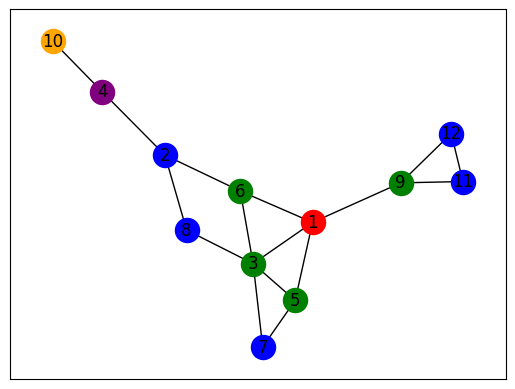

In [ ]:
layers = list(nx.bfs_layers(g, 1))
pos = nx.spring_layout(g)

colors = ["red", "green", "blue", "purple", "orange", "yellow"]

for i, layer in enumerate(layers):
    nx.draw_networkx_nodes(g, pos, layer, node_color=colors[i])

nx.draw_networkx_labels(g, pos)
nx.draw_networkx_edges(g, pos)



## Birpartitnost graga

Napisati program koji provjerava da li je graf bipartitan.

In [ ]:
# print(nx.is_bipartite(g))

def is_bipartite(g):
  visited = {u: False for u in g.nodes}
  dists = {u: -1 for u in g.nodes}

  def f(source):
      layers = nx.bfs_layers(g, source)
      for i, layer in enumerate(layers):
        for node in layer:
          dists[node] = i

  for u in g.nodes:
    if not visited[u]:
      f(u)

  for u,v in g.edges:
    if dists[u] % 2 == dists[v] % 2:
      return False

  return True

is_bipartite(g)

False

In [ ]:
nx.cycle_basis(g)
list(nx.simple_cycles(g))

[[11, 9, 12], [3, 6, 1], [3, 8, 2, 6], [3, 5, 1], [3, 7, 5]]

In [ ]:
nx.all_pairs_node_connectivity(g)

{1: {3: 3, 5: 2, 6: 2, 7: 2, 2: 2, 8: 2, 4: 1, 10: 1, 9: 1, 11: 1, 12: 1},
 3: {1: 3, 5: 3, 6: 3, 7: 2, 2: 2, 8: 2, 4: 1, 10: 1, 9: 1, 11: 1, 12: 1},
 5: {1: 2, 3: 3, 6: 2, 7: 2, 2: 2, 8: 2, 4: 1, 10: 1, 9: 1, 11: 1, 12: 1},
 6: {1: 2, 3: 3, 5: 2, 7: 2, 2: 2, 8: 2, 4: 1, 10: 1, 9: 1, 11: 1, 12: 1},
 7: {1: 2, 3: 2, 5: 2, 6: 2, 2: 2, 8: 2, 4: 1, 10: 1, 9: 1, 11: 1, 12: 1},
 2: {1: 2, 3: 2, 5: 2, 6: 2, 7: 2, 8: 2, 4: 1, 10: 1, 9: 1, 11: 1, 12: 1},
 8: {1: 2, 3: 2, 5: 2, 6: 2, 7: 2, 2: 2, 4: 1, 10: 1, 9: 1, 11: 1, 12: 1},
 4: {1: 1, 3: 1, 5: 1, 6: 1, 7: 1, 2: 1, 8: 1, 10: 1, 9: 1, 11: 1, 12: 1},
 10: {1: 1, 3: 1, 5: 1, 6: 1, 7: 1, 2: 1, 8: 1, 4: 1, 9: 1, 11: 1, 12: 1},
 9: {1: 1, 3: 1, 5: 1, 6: 1, 7: 1, 2: 1, 8: 1, 4: 1, 10: 1, 11: 2, 12: 2},
 11: {1: 1, 3: 1, 5: 1, 6: 1, 7: 1, 2: 1, 8: 1, 4: 1, 10: 1, 9: 2, 12: 2},
 12: {1: 1, 3: 1, 5: 1, 6: 1, 7: 1, 2: 1, 8: 1, 4: 1, 10: 1, 9: 2, 11: 2}}